In [1]:
# EDA를 위한 분석 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#검증 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split
#학습을 위한 모델 클래스
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#평가를 위한 함수(정확도)
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv("./data/salary/train.csv", index_col="no")
test = pd.read_csv("./data/salary/test.csv" , index_col="no")
display("Train")
display(train.head())
display("Test")
display(test.head())

'Train'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


'Test'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
29306,18,?,245274,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,United-States
29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States


In [3]:
# 전체 데이터 수 파악
train.shape, test.shape

((29305, 15), (19537, 14))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


In [5]:
# 범주형 데이터
# workclass, education, marital-status, occupation, relationship, race, sex, native-country
# 수치형 데이터
# age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

In [6]:
display(train.corr()) # 상관계수 확인

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.075753,0.035084,0.078498,0.054413,0.073100,0.238460
fnlwgt,-0.075753,1.000000,-0.030600,-0.005051,-0.001513,-0.010154,-0.002994
education-num,0.035084,-0.030600,1.000000,0.127651,0.083925,0.147569,0.331798
capital-gain,0.078498,-0.005051,0.127651,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.054413,-0.001513,0.083925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.073100,-0.010154,0.147569,0.088609,0.055271,1.000000,0.231045
income,0.238460,-0.002994,0.331798,0.221387,0.135645,0.231045,1.000000


In [7]:
# 결측치 확인(결측치 null이 아닌 " ?"로 처리되어있음) 
# 숫자형에는 결측치 없음
# workclass(1663), occupation(1668), native-country(495) 결측치 있음
# workclass - private 수가 너무 많아서 의미 없을거 같음(결측치private로 처리)
# occupation - 결측치 처리 하지 않고 ? 그대로 사용할것임 -> 3~4단계로 분류
# native-country - United-States수가 너무 많아서 의미 없을거 같음(결측치United-States로 처리)
train[train['native-country']==" ?"].count()


age               495
workclass         495
fnlwgt            495
education         495
education-num     495
marital-status    495
occupation        495
relationship      495
race              495
sex               495
capital-gain      495
capital-loss      495
hours-per-week    495
native-country    495
income            495
dtype: int64

In [8]:
train['native-country']=train['native-country'].str.replace("?","United-States")
train['workclass']=train['workclass'].str.replace("?","private")

C:\Users\pipi1\AppData\Local\Temp\ipykernel_3808\1488058291.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['native-country']=train['native-country'].str.replace("?","United-States")
C:\Users\pipi1\AppData\Local\Temp\ipykernel_3808\1488058291.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['workclass']=train['workclass'].str.replace("?","private")


In [9]:
test['native-country']=test['native-country'].str.replace("?","United-States")
test['workclass']=test['workclass'].str.replace("?","private")

C:\Users\pipi1\AppData\Local\Temp\ipykernel_3808\1070983275.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['native-country']=test['native-country'].str.replace("?","United-States")
C:\Users\pipi1\AppData\Local\Temp\ipykernel_3808\1070983275.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['workclass']=test['workclass'].str.replace("?","private")


In [10]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [11]:
# 인코딩
# workclass - 의미X
# education - education-num이랑 비율같아서 인코딩 필요 없음
# race - white 비율 너무 높아서 의미X
# native-country - United-States 비율 너무 높아서 의미X
# 원핫인코딩 marital-status, occupation, relationship, sex, marital-status, occupation


In [12]:
train['native-country'].value_counts()

 United-States                 26796
 Mexico                          579
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 Jamaica                          68
 China                            68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Columbia                         53
 Poland                           53
 Guatemala                        51
 Haiti                            51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Peru                             25
 Greece                           25
 

In [13]:
list=np.arange(1,16)
list=list.tolist()
list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [14]:
train[['occupation','income']].groupby(['occupation']).mean().sort_values(by='income')

,income
occupation,
Priv-house-serv,0.020548
Other-service,0.043361
Handlers-cleaners,0.066453
?,0.104916
Farming-fishing,0.106982
Machine-op-inspct,0.131971
Adm-clerical,0.133140
Transport-moving,0.202441
Craft-repair,0.225771


In [15]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [16]:
# 정답 분리

y = train.loc[:,'income'] 
X = train.drop(['income'],axis=1)
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States


In [17]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [18]:
#원핫 인코딩  marital-status, occupation, relationship, sex
feature_names=['workclass','education','marital-status', 'occupation', 'relationship', 'sex','race','native-country']               
train_one_hot = pd.get_dummies(X[feature_names])
train_one_hot

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_ private,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
no,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
29302,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29303,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# test처리
test_one_hot = pd.get_dummies(test[feature_names])
test_one_hot

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_ private,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
no,,,,,,,,,,,,,,,,,,,,,
29306,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
29307,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29308,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29309,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29310,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48840,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
# 원핫인코딩한거 붙이기
train = pd.concat([X,train_one_hot], axis=1)
test = pd.concat([test,test_one_hot], axis=1)

In [21]:
train.drop(feature_names,axis=1,inplace=True)
test.drop(feature_names,axis=1,inplace=True)

In [22]:
display(train.corr())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
age,1.000000,-0.075753,0.035084,0.078498,0.054413,0.073100,0.051267,0.055062,-0.019066,-0.191909,...,0.002053,0.006689,0.019706,0.002682,-0.013193,0.003635,0.000169,0.013611,-0.015880,0.004885
fnlwgt,-0.075753,1.000000,-0.030600,-0.005051,-0.001513,-0.010154,-0.009251,-0.002666,-0.001762,0.044555,...,-0.013027,0.009008,-0.005327,-0.009146,-0.004226,-0.003534,0.006659,-0.079893,-0.004631,0.010224
education-num,0.035084,-0.030600,1.000000,0.127651,0.083925,0.147569,0.056834,0.097920,-0.019735,-0.121684,...,-0.039738,-0.045836,-0.006628,0.012659,0.044341,0.016290,-0.008877,0.130978,-0.003909,0.001211
capital-gain,0.078498,-0.005051,0.127651,1.000000,-0.031401,0.088609,-0.003809,-0.017150,-0.001890,-0.035788,...,-0.005010,-0.006772,-0.002536,-0.001570,0.009077,-0.001805,-0.002370,0.010223,-0.004058,-0.000153
capital-loss,0.054413,-0.001513,0.083925,-0.031401,1.000000,0.055271,0.014410,0.015404,-0.002835,-0.031955,...,-0.008319,0.003769,-0.003804,0.002678,0.000252,0.000673,-0.004572,0.012313,0.006336,-0.004572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_ Thailand,0.003635,-0.003534,0.016290,-0.001805,0.000673,-0.002276,-0.003921,0.000271,-0.000296,-0.001467,...,-0.000867,-0.001433,-0.000397,-0.001139,-0.000826,1.000000,-0.000477,-0.073956,-0.000936,-0.000477
native-country_ Trinadad&Tobago,0.000169,0.006659,-0.008877,-0.002370,-0.004572,-0.001803,0.005984,0.001137,-0.000275,-0.000191,...,-0.000808,-0.001334,-0.000369,-0.001060,-0.000769,-0.000477,1.000000,-0.068846,-0.000871,-0.000444
native-country_ United-States,0.013611,-0.079893,0.130978,0.010223,0.012313,0.003285,0.017486,0.033414,0.003997,-0.048160,...,-0.125276,-0.206907,-0.057280,-0.164429,-0.119299,-0.073956,-0.068846,1.000000,-0.135104,-0.068846
native-country_ Vietnam,-0.015880,-0.004631,-0.003909,-0.004058,0.006336,-0.007040,-0.007163,-0.000633,-0.000540,0.012906,...,-0.001585,-0.002617,-0.000725,-0.002080,-0.001509,-0.000936,-0.000871,-0.135104,1.000000,-0.000871


In [23]:
train.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       ...
       'native-country_ Portugal', 'native-country_ Puerto-Rico',
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia'],
      dtype='object', length=107)

In [24]:
train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
no,,,,,,,,,,,,,,,,,,,,,
1,25,219199,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,39,52978,10,0,1721,55,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,35,196899,13,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,64,135527,11,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,24,60783,10,0,0,70,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,100605,9,0,0,40,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
29302,21,372636,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
29303,18,258474,6,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
# train.drop(['workclass', 'fnlwgt', 'education'],axis=1,inplace=True)
# train

In [26]:
# test.drop(['workclass', 'fnlwgt', 'education'],axis=1,inplace=True)

In [27]:
train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
no,,,,,,,,,,,,,,,,,,,,,
1,25,219199,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,39,52978,10,0,1721,55,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,35,196899,13,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,64,135527,11,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,24,60783,10,0,0,70,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,100605,9,0,0,40,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
29302,21,372636,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
29303,18,258474,6,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# 새로 추가한 Cabin_T 때문에 test의 컬럼순서가 1칸씩 밀림
# (train에만 있는 컬럼이라 학습한거와 테스트할때 다를 수 있음)
train.sort_index(axis=1,inplace=True)
test.sort_index(axis=1,inplace=True)

In [29]:
set(train.columns)-set(test.columns)

{'native-country_ Holand-Netherlands'}

In [30]:
train.shape, test.shape

((29305, 107), (19537, 106))

In [31]:
train

,age,capital-gain,capital-loss,education-num,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,...,sex_ Male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_ private
no,,,,,,,,,,,,,,,,,,,,,
1,25,0,0,7,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,39,0,1721,10,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,35,0,0,13,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,64,0,0,11,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,24,0,0,10,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,0,0,9,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
29302,21,0,0,9,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
29303,18,0,0,6,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [32]:
test

,age,capital-gain,capital-loss,education-num,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,...,sex_ Male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_ private
no,,,,,,,,,,,,,,,,,,,,,
29306,18,0,0,10,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
29307,29,0,0,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
29308,45,0,0,13,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
29309,42,0,0,13,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
29310,41,0,1902,16,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,45,0,0,9,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
48839,48,0,0,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
48840,63,4386,0,10,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [33]:
# 모델 정의
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

In [34]:
# 2. 훈련데이터를 8:2로 분리해서 train2,val셋으로 구성
# (randomstate = 921)
X_train2,X_val,y_train2,y_val=train_test_split(train,y,test_size=0.2, random_state=0)

In [35]:
#3-1. KNN 모델 최적화
train_score_list = []   # 훈련데이터 점수 리스트
val_score_list = []   # 검증데이터 점수 리스트
for n in range(1,25):   #이웃의 숫자를 1~24명 설정
    m=KNeighborsClassifier(n_neighbors=n)
    m.fit(X_train2,y_train2)
    # 훈련데이터 예측 및 평가
    pre_train = m.predict(X_train2)
    score_train = accuracy_score(y_train2, pre_train)
    train_score_list.append(score_train)
    # 검증데이터 예측 및 평가
    pre_val = m.predict(X_val)
    score_val = accuracy_score(y_val,pre_val)
    val_score_list.append(score_val)


KeyboardInterrupt: 

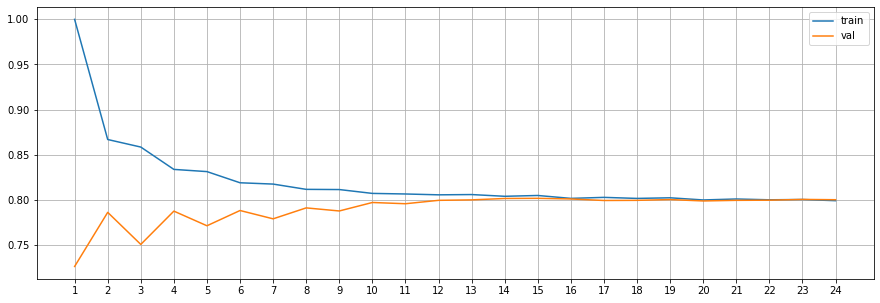

In [ ]:
# 시각화 
plt.figure(figsize=(15,5)) # 그림의 크기 설정(가로,세로) 인치
plt.plot(range(1,25),train_score_list, label='train') # 라인1
plt.plot(range(1,25),val_score_list, label='val') # 라인2
plt.xticks(range(1,25)) # x축 눈금
plt.grid() # 배경 격자무늬
plt.legend() # 범례
plt.show() # 그림 보여주기


In [ ]:
# 3-2 tree 모델 최적화
train_score_list=[] #훈련데이터 평가 점수가 담긴다.
val_score_list=[] #검증데이터 평가 점수가 담긴다.
for d in range(1,31): 
    m = DecisionTreeClassifier(max_depth=d) # 최대깊이가 다른 모델을 계속 생성
    m.fit(X_train2,y_train2)
    #훈련데이터 예측
    pre_train = m.predict(X_train2) 
    score_train=accuracy_score(y_train2,pre_train)
    train_score_list.append(score_train)
    #검증데이터 예측
    pre_val = m.predict(X_val)
    score_val=accuracy_score(y_val,pre_val)
    val_score_list.append(score_val)

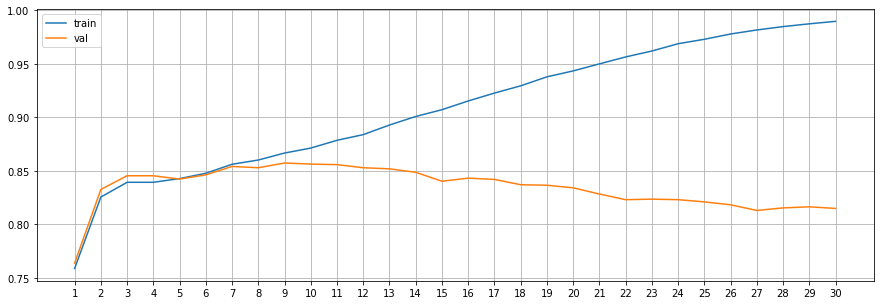

In [ ]:
# 시각화 
plt.figure(figsize=(15,5)) # 그림의 크기 설정(가로,세로) 인치
plt.plot(range(1,31),train_score_list, label='train') # 라인1
plt.plot(range(1,31),val_score_list, label='val') # 라인2
plt.xticks(range(1,31)) # x축 눈금
plt.grid() # 배경 격자무늬
plt.legend() # 범례
plt.show() # 그림 보여주기

In [36]:
# 3. 최종 학습
final_knn_model = KNeighborsClassifier(n_neighbors=10)
final_knn_model.fit(X_train2,y_train2)
final_tree_model = DecisionTreeClassifier(max_depth=9)
final_tree_model.fit(X_train2,y_train2)

DecisionTreeClassifier(max_depth=9)

In [37]:
test.shape, X_train2.shape

((19537, 106), (23444, 107))

In [ ]:
X_train2

,age,capital-gain,capital-loss,education-num,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,...,sex_ Male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_ private
no,,,,,,,,,,,,,,,,,,,,,
349,66,20051,0,16,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2158,32,0,0,10,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17884,21,0,2001,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10086,45,0,0,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
24131,31,0,0,11,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,23,0,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19649,48,3103,0,10,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
9846,35,0,0,7,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [38]:
test['native-country_ Holand-Netherlands'] = 0

In [ ]:
# kaggle 업로드해서 평가
# 28개의 feature를 가진 test데이터를 활용
knn_pre = final_knn_model.predict(test)
tree_pre = final_tree_model.predict(test)

c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
submission = pd.read_csv("./data/salary/sample_submission.csv")
submission

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [ ]:
#KNN 예측 값 파일로 저장
submission['income'] = knn_pre
submission.to_csv("./data/salary/knn_pre1.csv", index=False)

In [ ]:
#tree 예측 값 파일로 저장
submission['income'] = tree_pre
submission.to_csv("./data/salary/tree_pre1.csv", index=False)

In [39]:
#전처리한 파일 저장
train.to_csv("./data/salary/preprocessing_X_train1.csv")
test.to_csv("./data/salary/preprocessing_X_test1.csv")
y.to_csv("./data/salary/y_train1.csv")

In [ ]:
y_train2

no
349      1
2158     0
17884    0
10086    1
24131    0
        ..
13124    0
19649    1
9846     0
10800    0
2733     0
Name: income, Length: 23444, dtype: int64

In [ ]:
X_train2.columns

Index(['age', 'capital-gain', 'capital-loss', 'education-num',
       'education_ 10th', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       ...
       'sex_ Male', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'workclass_ private'],
      dtype='object', length=107)

In [ ]:
salary_model = DecisionTreeClassifier(max_depth=9)

In [ ]:
X_train2

,age,capital-gain,capital-loss,education-num,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,...,sex_ Male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,workclass_ private
no,,,,,,,,,,,,,,,,,,,,,
349,66,20051,0,16,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2158,32,0,0,10,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17884,21,0,2001,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10086,45,0,0,9,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
24131,31,0,0,11,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,23,0,0,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
19649,48,3103,0,10,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
9846,35,0,0,7,0,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [41]:
X_train= X_train2[['age','education-num','capital-gain','capital-loss','hours-per-week','workclass_ Federal-gov',
 'workclass_ Self-emp-inc','marital-status_ Married-AF-spouse','marital-status_ Married-civ-spouse','occupation_ ?',
 'occupation_ Adm-clerical','occupation_ Armed-Forces','occupation_ Exec-managerial','occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners','occupation_ Machine-op-inspct','occupation_ Other-service','occupation_ Priv-house-serv','occupation_ Prof-specialty',
 'occupation_ Protective-serv','relationship_ Husband','relationship_ Not-in-family',
 'relationship_ Other-relative','relationship_ Other-relative','relationship_ Own-child',
 'relationship_ Unmarried','relationship_ Wife','race_ Amer-Indian-Eskimo','race_ Black','race_ Other','sex_ Female','sex_ Male','native-country_ Cambodia',
 'native-country_ Canada','native-country_ Columbia','native-country_ Dominican-Republic','native-country_ Dominican-Republic','native-country_ Ecuador',
 'native-country_ El-Salvador','native-country_ England','native-country_ France','native-country_ Germany','native-country_ Greece','native-country_ Guatemala',
 'native-country_ Haiti','native-country_ Holand-Netherlands','native-country_ Honduras','native-country_ Hungary','native-country_ India','native-country_ Iran',
 'native-country_ Ireland','native-country_ Italy','native-country_ Jamaica','native-country_ Japan','native-country_ Laos','native-country_ Mexico','native-country_ Nicaragua',
 'native-country_ Outlying-US(Guam-USVI-etc)','native-country_ Peru','native-country_ Philippines','native-country_ Poland','native-country_ Portugal','native-country_ Puerto-Rico',
 'native-country_ Scotland','native-country_ South','native-country_ Taiwan','native-country_ Thailand','native-country_ Trinadad&Tobago','native-country_ Vietnam','native-country_ Yugoslavia']]

In [40]:

X_train= X_train2[['age','education-num','capital-gain','capital-loss','hours-per-week','workclass_ Federal-gov',
 'workclass_ Self-emp-inc','marital-status_ Married-AF-spouse','marital-status_ Married-civ-spouse','occupation_ ?',
 'occupation_ Adm-clerical','occupation_ Armed-Forces','occupation_ Exec-managerial','occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners','occupation_ Machine-op-inspct','occupation_ Other-service','occupation_ Priv-house-serv','occupation_ Prof-specialty',
 'occupation_ Protective-serv','relationship_ Husband','relationship_ Not-in-family',
 'relationship_ Other-relative','relationship_ Other-relative','relationship_ Own-child',
 'relationship_ Unmarried','relationship_ Wife','race_ Amer-Indian-Eskimo','race_ Black','race_ Other','sex_ Female','sex_ Male','native-country_ Cambodia',
 'native-country_ Canada','native-country_ Columbia','native-country_ Dominican-Republic','native-country_ Dominican-Republic','native-country_ Ecuador',
 'native-country_ El-Salvador','native-country_ England','native-country_ France','native-country_ Germany','native-country_ Greece','native-country_ Guatemala',
 'native-country_ Haiti','native-country_ Holand-Netherlands','native-country_ Honduras','native-country_ Hungary','native-country_ India','native-country_ Iran',
 'native-country_ Ireland','native-country_ Italy','native-country_ Jamaica','native-country_ Japan','native-country_ Laos','native-country_ Mexico','native-country_ Nicaragua',
 'native-country_ Outlying-US(Guam-USVI-etc)','native-country_ Peru','native-country_ Philippines','native-country_ Poland','native-country_ Portugal','native-country_ Puerto-Rico',
 'native-country_ Scotland','native-country_ South','native-country_ Taiwan','native-country_ Thailand','native-country_ Trinadad&Tobago','native-country_ Vietnam','native-country_ Yugoslavia']]

#y_train= y
X_train1,X_val,y_train1,y_val=train_test_split(X_train,y_train2,test_size=0.2, random_state=8)                                                                                                                       
salary_model.fit(X_train1,y_train1)
pre= salary_model.predict(X_val)
pre
score = accuracy_score(y_val,pre)
print("정확도 : ",score)

NameError: name 'salary_model' is not defined

In [ ]:
train.columns

Index(['age', 'capital-gain', 'capital-loss', 'education-num',
       'education_ 10th', 'education_ 11th', 'education_ 12th',
       'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th',
       ...
       'sex_ Male', 'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'workclass_ private'],
      dtype='object', length=107)

In [ ]:
# 캐글 업로드
X_test= test[['education-num','capital-loss', 'hours-per-week',
       'relationship_ Husband', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife', 'sex_ Female',
       'sex_ Male']]

In [ ]:
test_pre=salary_model.predict(X_test)
test_pre

c:\Users\pipi1\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- hours-per-week
Feature names seen at fit time, yet now missing:
- age
- capital-gain
- marital-status_ Divorced
- marital-status_ Married-AF-spouse
- marital-status_ Married-civ-spouse
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 11 features, but KNeighborsClassifier is expecting 16 features as input.

In [ ]:
submission = pd.read_csv("./data/salary/sample_submission.csv")
submission

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [42]:
#전처리한 파일 저장
X_train.to_csv("./data/salary/preprocessing_X_train5.csv")
test.to_csv("./data/salary/preprocessing_X_test5.csv")
y_train2.to_csv("./data/salary/y_train5.csv")